<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br><br><br>

# Listed Volatility and Variance Derivatives

**Dr. Yves J. Hilpisch &mdash; Wiley Finance (2016)**

<img src="http://hilpisch.com/images/lvvd_cover.png" alt="Derivatives Analytics with Python" width="30%" align="left" border="0">

# Realized Variance and Variance Swaps

## Introdution

## Realized Variance

In [1]:
import math
import numpy as np
import pandas as pd

In [2]:
## text/csv file containing daily closing levels of EURO STOXX 50 index
path = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/'
es_url = path + 'hbrbcpe.txt'

In [3]:
## column names for the data set
cols = ['Date', 'SX5P', 'SX5E', 'SXXP', 'SXXE',
        'SXXF', 'SXXA', 'DK5F', 'DKXF', 'DEL']
try: # reading the data with pandas
    es = pd.read_csv(es_url,  # filename
                     header=None,  # ignore column names
                     index_col=0,  # index column (dates)
                     parse_dates=True,  # parse these dates
                     dayfirst=True,  # format of dates
                     skiprows=4,  # ignore these rows
                     sep=';',  # data separator
                     names=cols)  # use these column names
    del es['DEL']
except: # read stored data if there is no Internet connection
    es = pd.HDFStore('./source/data/SX5E.h5', 'r')['SX5E']
es = es[es.index < '2015-12-31']

In [4]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
Date,,,,,,,,
2015-12-23,3109.23,3286.68,366.39,346.14,433.58,375.53,9927.33,614.12
2015-12-24,3108.11,3284.47,366.28,346.05,433.43,375.39,9931.72,614.38
2015-12-28,3093.61,3256.49,364.49,343.54,431.26,374.32,9873.94,611.58
2015-12-29,3139.28,3314.28,369.68,349.29,438.43,378.86,10023.66,620.66
2015-12-30,3118.07,3287.98,367.70,347.02,435.82,377.20,9956.22,617.48


In [5]:
import seaborn as sns; sns.set()
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
%matplotlib inline

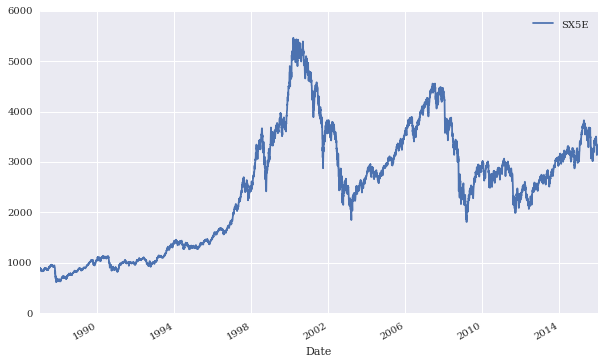

In [6]:
data = pd.DataFrame({'SX5E': es['SX5E']})
data.plot(figsize=(10, 6));

In [7]:
data['R_n'] = np.log(data['SX5E'] / data['SX5E'].shift(1))

In [8]:
data.tail()

,SX5E,R_n
Date,,
2015-12-23,3286.68,0.022262
2015-12-24,3284.47,-0.000673
2015-12-28,3256.49,-0.008555
2015-12-29,3314.28,0.017590
2015-12-30,3287.98,-0.007967


In [9]:
## np.cumsum calculates the element-wise cumulative sum of an array/time series
## np.arange(N) gives an array of the form [0, 1, ..., N-1]
data['sigma**2'] = 10000 * 252 * (np.cumsum(data['R_n'] ** 2) 
                                  / np.arange(len(data)))

In [10]:
data.tail()

,SX5E,R_n,sigma**2
Date,,,
2015-12-23,3286.68,0.022262,446.280005
2015-12-24,3284.47,-0.000673,446.220423
2015-12-28,3256.49,-0.008555,446.185389
2015-12-29,3314.28,0.017590,446.230025
2015-12-30,3287.98,-0.007967,446.191722


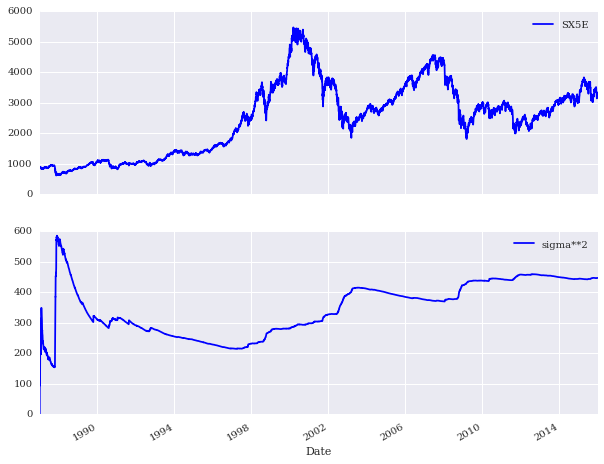

In [11]:
# @savefig es_s2_paths_lt.pdf
data[['SX5E', 'sigma**2']].plot(subplots=True,
                                 figsize=(10, 8),
                                 color='blue',
                                 grid=True);

In [12]:
## select time series data with date later/earlier than given dates
short = data[['SX5E', 'R_n']][(data.index > '2015-7-1')
                             & (data.index <= '2015-12-31')]

## calculate the realized variance in percent values
short['sigma**2'] = 10000 * 252 * (np.cumsum(short['R_n'] ** 2)
                                   / np.arange(len(short)))


In [13]:
short.head()

,SX5E,R_n,sigma**2
Date,,,
2015-07-02,3463.25,-0.009492,inf
2015-07-03,3441.76,-0.006224,324.686954
2015-07-06,3365.20,-0.022496,799.967421
2015-07-07,3294.19,-0.021327,915.381074
2015-07-08,3327.50,0.010061,750.306250


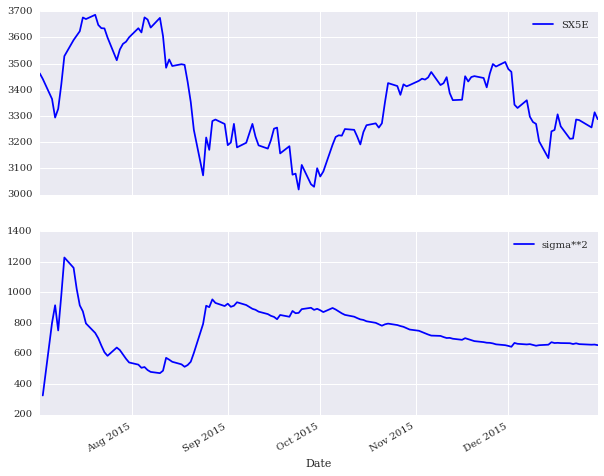

In [14]:
short[['SX5E', 'sigma**2']].plot(subplots=True,
                                 figsize=(10, 8),
                                 color='blue',
                                 grid=True);

## Variance Swaps

### Definition of a Variance Swap

### Numerical Example

In [15]:
import sys
sys.path.append('scripts/')
from variance_swaps import generate_path 

In [16]:
S0 = 100  # initial index level
r = 0.005  # risk-less short rate
sigma = 0.2  # instantaneous volatility
T = 1.0 # maturity date
M = 50  # number of time intervals

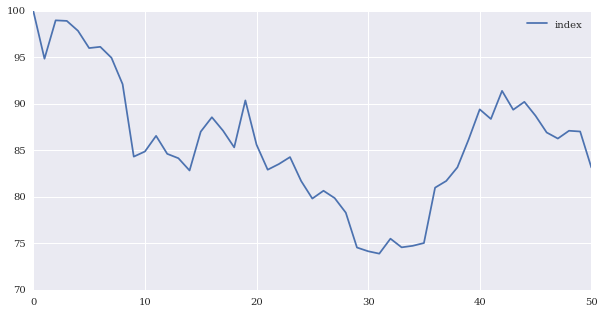

In [17]:
data = generate_path(S0, r, sigma, T, M)
data.plot(figsize=(10, 5));

In [18]:
data['R_t'] = np.log(data['index'] / data['index'].shift(1))
## scaling now by M / T since returns are not necessarily daily returns
data['sigma**2'] = 10000 * M / T * (np.cumsum(data['R_t'] ** 2)
                                    / np.arange(len(data)))
data.tail()

,index,R_t,sigma**2
46,86.914274,-0.020492,462.916655
47,86.263467,-0.007516,453.668339
48,87.101314,0.009666,445.190118
49,87.020414,-0.000929,436.113416
50,83.157399,-0.045408,448.009603


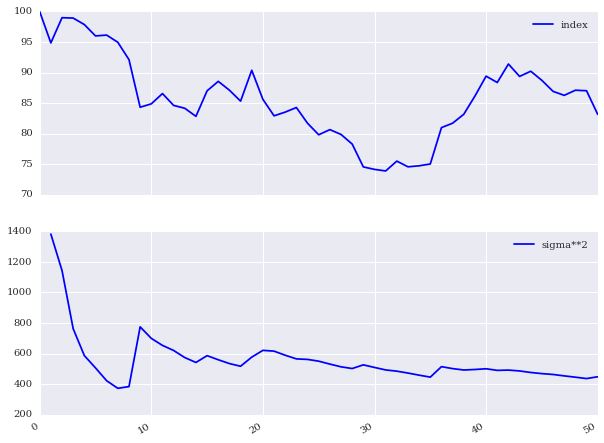

In [19]:
data[['index', 'sigma**2']].plot(subplots=True,
                                 figsize=(10, 8),
                                 color='blue',
                                 grid=True);

In [20]:
data['sigma**2'].iloc[-1] - 20 ** 2

48.009603247833525

In [21]:
Notional = 100000. / (2 * 20)
Notional

2500.0

In [22]:
Notional * (data['sigma**2'].iloc[-1] - 20 ** 2)

120024.00811958381

### Mark-to-Market

In [23]:
dt = T / M
t = np.arange(M + 1) * dt
t
sigma_K = 20
data['V_t'] = Notional * np.exp(-r * (T - t)) * ((t * data['sigma**2']
                        + (T - t) * sigma_K ** 2) / T - sigma_K ** 2) 
data.tail()

,index,R_t,sigma**2,V_t
46,86.914274,-0.020492,462.916655,144650.434548
47,86.263467,-0.007516,453.668339,126082.766551
48,87.101314,0.009666,445.190118,108434.594165
49,87.020414,-0.000929,436.113416,88469.022898
50,83.157399,-0.045408,448.009603,120024.008120


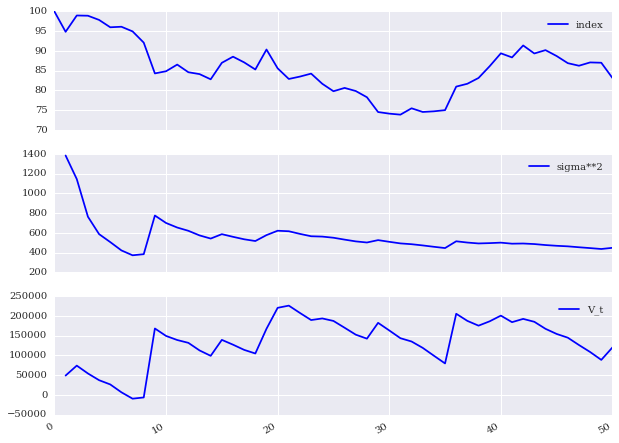

In [24]:
data[['index', 'sigma**2', 'V_t']].plot(subplots=True,
                                 figsize=(10, 8),
                                 color='blue',
                                 grid=True);

### Vega Sensitivity

### Variance Swap on the EURO STOXX 50

In [25]:
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7475 entries, 1986-12-31 to 2015-12-30
Data columns (total 8 columns):
SX5P    7475 non-null float64
SX5E    7475 non-null float64
SXXP    7475 non-null float64
SXXE    7475 non-null float64
SXXF    7475 non-null float64
SXXA    7475 non-null float64
DK5F    7475 non-null float64
DKXF    7475 non-null float64
dtypes: float64(8)
memory usage: 525.6 KB


In [26]:
vs_url = path + 'h_vstoxx.txt'
try: # reading the data with pandas
    vs = pd.read_csv(vs_url,  # filename
                     index_col=0,  # index column (dates)
                     parse_dates=True,  # parse date information
                     dayfirst=True, # day before month
                     header=2,  # header/column names
                     sep=',')  # separator character
except: # read stored data if there is no Internet connection
    vs = pd.HDFStore('./source/data/V2TX.h5', 'r')
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [27]:
## 15 trading days
T = 15.

In [28]:
data = pd.DataFrame(es['SX5E'][(es.index > '2015-5-31')
                        & (es.index < '2015-6-20')])

In [29]:
data['V6I1'] = vs['V6I1'][(vs.index > '2015-5-31')
                        & (vs.index < '2015-6-20')]

In [30]:
data

,SX5E,V6I1
Date,,
2015-06-01,3575.04,25.8710
2015-06-02,3561.89,25.9232
2015-06-03,3583.82,25.7958
2015-06-04,3556.38,26.2418
2015-06-05,3510.01,27.4496
2015-06-08,3468.31,27.2996
2015-06-09,3456.79,26.8020
2015-06-10,3526.48,25.8610
2015-06-11,3551.91,26.3897


In [31]:
data = data.fillna(method='ffill')

In [32]:
h5 = pd.HDFStore('data/SX5E_V6I1.h5')
h5['SX5E_V6I1'] = data
h5.close()

In [33]:
data['V6I1'][0]
sigma_K = data['V6I1'][0]
Notional = 100000 / (2. * sigma_K)
Notional

1932.665919369178

In [34]:
data['R_t'] = np.log(data['SX5E'] / data['SX5E'].shift(1))

In [35]:
data['sigma**2'] = 10000 * 252 * (np.cumsum(data['R_t'] ** 2)
                                  / np.arange(len(data)))

In [36]:
t = np.arange(1, 16)
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [37]:
r = 0.001
data['V_t'] = np.exp(-r * (T - t) / 365.) * ((t * data['sigma**2']
                + (T - t) * data['V6I1'] ** 2) / T - sigma_K ** 2) 

In [38]:
data['V_t'].loc['2015-06-01'] = 0.0

In [39]:
data

,SX5E,V6I1,R_t,sigma**2,V_t
Date,,,,,
2015-06-01,3575.04,25.8710,NaN,NaN,0.000000
2015-06-02,3561.89,25.9232,-0.003685,34.220799,-82.332277
2015-06-03,3583.82,25.7958,0.006138,64.580457,-124.049833
2015-06-04,3556.38,26.2418,-0.007686,92.677552,-139.593571
2015-06-05,3510.01,27.4496,-0.013124,178.023718,-107.644092
2015-06-08,3468.31,27.2996,-0.011951,214.408816,-136.380856
2015-06-09,3456.79,26.8020,-0.003327,183.323049,-200.634978
2015-06-10,3526.48,25.8610,0.019960,300.555651,-196.905901
2015-06-11,3551.91,26.3897,0.007185,279.249096,-223.189008


In [40]:
Notional * data['V_t'][-1]

-755681.59959400445

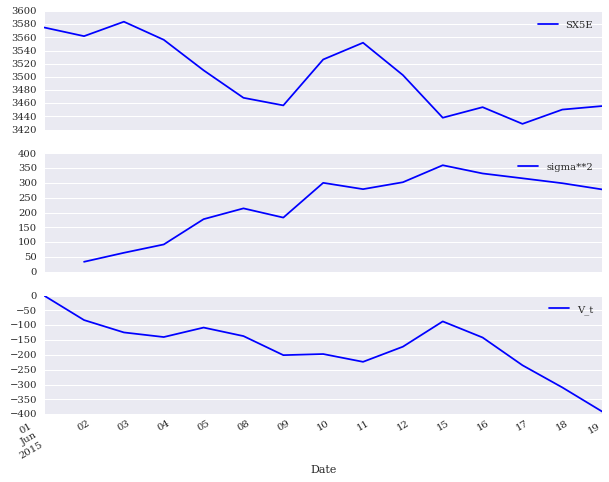

In [41]:
data[['SX5E', 'sigma**2', 'V_t']].plot(subplots=True,
                                       color='blue',
                                       figsize=(10, 8));

In [42]:
h5 = pd.HDFStore('data/var_data.h5', 'a')
h5['var_swap'] = data
h5.close()

## Variance vs. Volatility

### Squared Variations

### Additivity in Time

In [43]:
## function to calculate the realized variance
rv = lambda ret_dat: 10000 * 252. / N * np.sum(ret_dat ** 2)

In [44]:
data = np.array([0.01, 0.02, 0.03, 0.04, 0.05])

In [45]:
N = len(data)
N

5

In [46]:
rv(data[:2]) + rv(data[2:])

2772.0000000000005

In [47]:
rv(data)

2772.0000000000005

In [48]:
data = pd.DataFrame(es['SX5E'][(es.index > '31-12-2012')
                             & (es.index < '01-01-2014')])
## we need log returns
data['R_t'] = np.log(data['SX5E'] / data['SX5E'].shift(1))

In [49]:
N = len(data) - 1
N
var_1st = rv(data['R_t'][data.index < '2013-07-01'])
var_1st
var_2nd = rv(data['R_t'][data.index > '2013-06-30']) 
var_2nd

98.3424775210876

In [50]:
var_1st + var_2nd
var_full = rv(data['R_t'])
var_full

257.4914940719223

In [51]:
vol_1st = math.sqrt(rv(data['R_t'][data.index < '2013-07-01']))
vol_1st
vol_2nd = math.sqrt(rv(data['R_t'][data.index > '2013-06-30']))
vol_2nd
vol_1st + vol_2nd
vol_full = math.sqrt(rv(data['R_t']))
vol_full

16.04654149877544

### Static Hedges

### Broad Measure of Risk

## Conclusions

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>

**DX Analytics** |
<a href="http://dx-analytics.com">http://dx-analytics.com</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance Books** |
<a href="http://books.tpq.io" target="_blank">http://books.tpq.io</a>

**Python for Finance Training** |
<a href="http://training.tpq.io" target="_blank">http://training.tpq.io</a>